In [6]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [3]:
test.shape

(418, 11)

In [4]:
train.shape

(891, 12)

In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


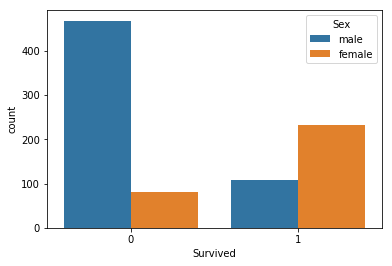

In [30]:
#Counting the number of survivals 
sns.countplot('Survived', data=train, hue='Sex')

In [33]:
X_tr = train[['Pclass','Sex','Age', 'Fare']]
y_tr = train.Survived
X_te = test[['Pclass', 'Sex', 'Age', 'Fare']]

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le = LabelEncoder()

In [37]:
X_tr['Sex'] = le.fit_transform(X_tr['Sex'])
X_te['Sex'] = le.fit_transform(X_te['Sex'])

/home/prathamesh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/prathamesh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
from sklearn.preprocessing import Imputer

In [39]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

/home/prathamesh/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [40]:
imp = imp.fit(X_tr)

In [41]:
X_tr = imp.transform(X_tr)

In [42]:
imp = imp.fit(X_te)
X_te = imp.transform(X_te)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_eval, y_train, y_eval = train_test_split(X_tr, y_tr, test_size=0.2, random_state=0)

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [49]:
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [50]:
X_train_std = sc.transform(X_train)

In [51]:
X_eval_std = sc.transform(X_eval)

In [56]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='gini')
model.fit(X_train_std, y_train)
y_pred = model.predict(X_eval_std)

In [57]:
from sklearn import metrics
print(metrics.accuracy_score(y_eval, y_pred))

0.8100558659217877


In [58]:
sc.fit(X_te)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [59]:
X_test_std = sc.transform(X_te)
y_test = model.predict(X_test_std)
y_test = pd.DataFrame(y_test)

In [61]:
y_test.shape

(418, 1)

In [69]:
passengerid = test[['PassengerId']]
result = y_test

In [74]:
submission = pd.concat([passengerid, result], axis=1)
submission.columns.values[1] = "Survived"

In [75]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,1
6,898,1
7,899,0
8,900,1
9,901,0
